In [1]:
%cd ..

/home/work/AnacondaProjects/categorical_bpl


In [2]:
import argparse
import collections
import pyro
import torch
import numpy as np
import data_loader.data_loaders as module_data
import model.model as module_arch
from parse_config import ConfigParser
from trainer import Trainer

In [3]:
%matplotlib inline

In [4]:
# pyro.enable_validation(True)
# torch.autograd.set_detect_anomaly(True)

In [5]:
# fix random seeds for reproducibility
SEED = 123
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(SEED)

In [6]:
Args = collections.namedtuple('Args', 'config resume device')
config = ConfigParser.from_args(Args(config='fashion_mnist_config.json', resume=None, device=None))

In [7]:
logger = config.get_logger('train')

In [8]:
# setup data_loader instances
data_loader = config.init_obj('data_loader', module_data)
valid_data_loader = data_loader.split_validation()

In [9]:
# build model architecture, then print to console
model = config.init_obj('arch', module_arch)

In [10]:
optimizer = pyro.optim.ReduceLROnPlateau({
    'optimizer': torch.optim.Adam,
    'optim_args': {
        "lr": 1e-3,
        "weight_decay": 0,
        "amsgrad": True
    },
    "patience": 20,
    "factor": 0.1,
    "verbose": True,
})

In [11]:
# optimizer = config.init_obj('optimizer', pyro.optim)

In [12]:
trainer = Trainer(model, [], optimizer, config=config,
                  data_loader=data_loader,
                  valid_data_loader=valid_data_loader,
                  lr_scheduler=optimizer)

In [13]:
trainer.train()

Train Epoch: 1 [512/54000 (1%)] Loss: 598543.187500
Train Epoch: 1 [11776/54000 (22%)] Loss: 399437.468750
Train Epoch: 1 [23040/54000 (43%)] Loss: 336487.843750
Train Epoch: 1 [34304/54000 (64%)] Loss: 243410.656250
Train Epoch: 1 [45568/54000 (84%)] Loss: 199241.718750
    epoch          : 1
    loss           : 323421.44265625
    val_loss       : 174488.375
Train Epoch: 2 [512/54000 (1%)] Loss: 170403.156250
Train Epoch: 2 [11776/54000 (22%)] Loss: 140246.312500
Train Epoch: 2 [23040/54000 (43%)] Loss: 143461.000000
Train Epoch: 2 [34304/54000 (64%)] Loss: 110403.453125
Train Epoch: 2 [45568/54000 (84%)] Loss: 85490.703125
    epoch          : 2
    loss           : 123952.788515625
    val_loss       : 76563.05390625
Train Epoch: 3 [512/54000 (1%)] Loss: 91415.406250
Train Epoch: 3 [11776/54000 (22%)] Loss: 62146.421875
Train Epoch: 3 [23040/54000 (43%)] Loss: 100183.367188
Train Epoch: 3 [34304/54000 (64%)] Loss: 40682.593750
Train Epoch: 3 [45568/54000 (84%)] Loss: 19823.876953


In [14]:
model.cpu()

VlaeCategoryModel(
  (_category): CartesianCategory(
    (generator_0): LadderDecoder(
      (distribution): DiagonalGaussian()
      (noise_layer): Sequential(
        (0): Linear(in_features=2, out_features=16, bias=True)
        (1): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
        (2): PReLU(num_parameters=1)
      )
      (neural_layers): Sequential(
        (0): Linear(in_features=32, out_features=32, bias=True)
        (1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
        (2): PReLU(num_parameters=1)
        (3): Linear(in_features=32, out_features=32, bias=True)
        (4): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
        (5): PReLU(num_parameters=1)
        (6): Linear(in_features=32, out_features=32, bias=True)
        (7): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
        (8): PReLU(num_parameters=1)
        (9): Linear(in_features=32, out_features=64, bias=True)
      )
    )
    (generator_0_dagger): LadderEncoder(
      (lad

In [15]:
import matplotlib.pyplot as plt

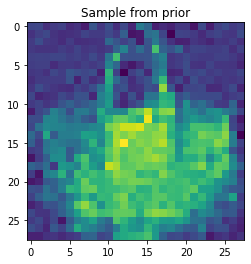

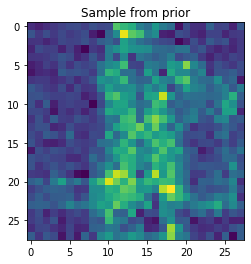

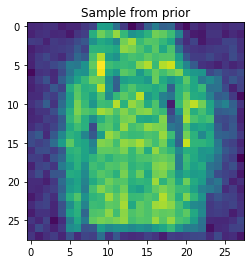

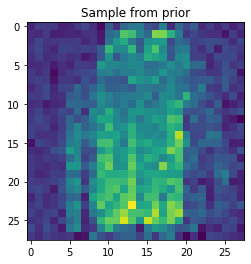

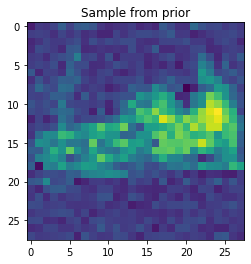

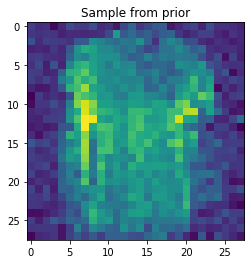

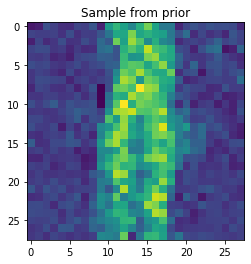

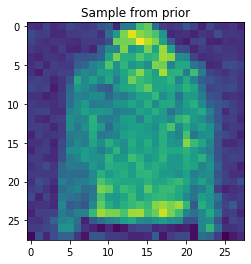

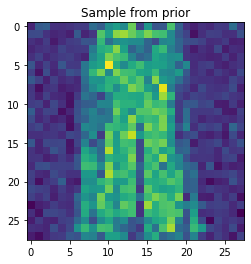

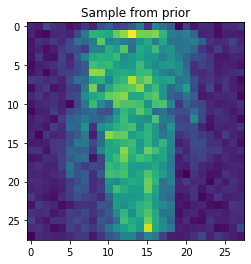

In [16]:
for k in range(10):
    path, sample = model(None)
    sample = sample.view(28, 28).detach().cpu().numpy()
    plt.show()

    plt.title('Sample from prior')
    plt.imshow(sample)
    plt.show()